In [1]:
import sys
sys.path.append('../')
from tqdm import tqdm

%matplotlib inline

from torus import *


In [2]:
def visualize(graph, pos=None, node_size=350, edge_size=14, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        
        if n_nodes%2 == 0:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}
        else:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    ax = plt.figure(figsize=(3*graph.length,3))
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 2,
    }
    
    plt.subplots_adjust(wspace=0.4)
    
    for t in range(graph.length):
        plt.subplot(1, graph.length, t+1)
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
            
        for i in range(graph.n_nodes):
            G.add_node(str(i))
                
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):
                    #if i > j:
                    if True:
                        if graph.w_list[t][i,j] > 0:
                            G.add_edge(str(i), str(j))
                            
                            """
                            # edge weight
                            if math.isclose(graph.w_list[t][i,j].item(), 0.5):    
                                pass
                                #edge_labels[(str(i), str(j))] = "1/2"
                            elif math.isclose(graph.w_list[t][i,j].item(), 2/3):
                                edge_labels[(str(i), str(j))] = "2/3"
                            elif math.isclose(graph.w_list[t][i,j].item(), 1/3):
                                edge_labels[(str(i), str(j))] = "1/3"
                            elif math.isclose(graph.w_list[t][i,j].item(), 4/5):
                                edge_labels[(str(i), str(j))] = "4/5"
                            elif math.isclose(graph.w_list[t][i,j].item(), 1/5):
                                edge_labels[(str(i), str(j))] = "1/5"
                            elif math.isclose(graph.w_list[t][i,j].item(), 8/9):
                                edge_labels[(str(i), str(j))] = "8/9"
                            elif math.isclose(graph.w_list[t][i,j].item(), 4/7):
                                edge_labels[(str(i), str(j))] = "4/7"
                            else:
                                edge_labels[(str(i), str(j))] = "??"
                            """
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")

        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, **options)
        
        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                font_size=edge_size)

In [3]:
def is_finite_conv(g):
    init_x = torch.eye(g.n_nodes)
    for w in g.w_list:
        init_x = init_x.matmul(w)

    label = torch.ones((g.n_nodes, g.n_nodes)) / g.n_nodes
    if torch.norm(label - init_x) < 1e-5:
        return True
    return False

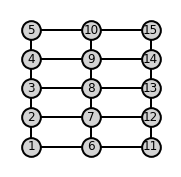

In [9]:
pos = {}

for i in range(3):
    for j in range(5):
        pos[str(i*5 + j)] = np.array([i, j])

g = Torus(3,5)
visualize(g, pos)

In [10]:
g.w_list[0].sum(1)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

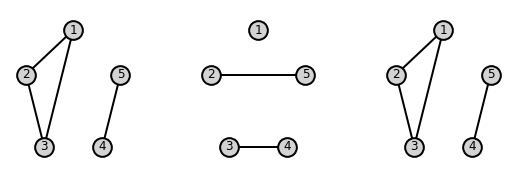

In [5]:
g = SimpleAdicGraph(5, max_degree=2)
visualize(g)

In [6]:
for n_nodes in range(1, 21):
    g = SimpleAdicGraph(n_nodes, max_degree=1)
    print(is_finite_conv(g))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
for w in g.w_list:
    print(w.sum(0), w.sum(1))

tensor([1., 1., 1., 1., 1., 1., 1.]) tensor([1., 1., 1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1., 1.]) tensor([1., 1., 1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1., 1.]) tensor([1., 1., 1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1., 1.]) tensor([1., 1., 1., 1., 1., 1., 1.])


# n_powerの求め方に問題がある。
* 最大約数 <= K+1 の場合を条件に追加
* n_power == 1の場合も追加

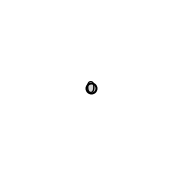

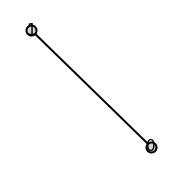

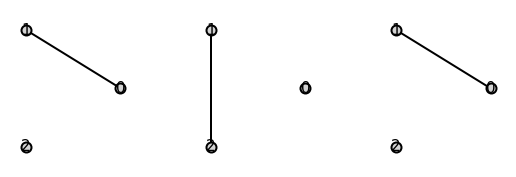

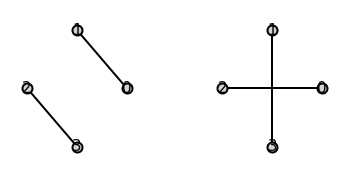

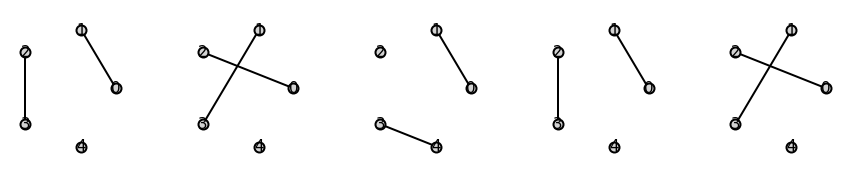

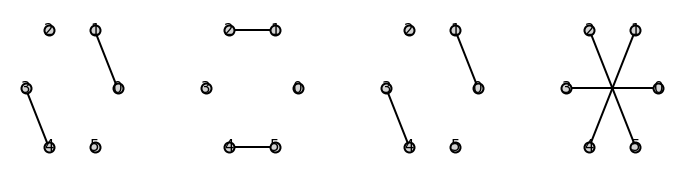

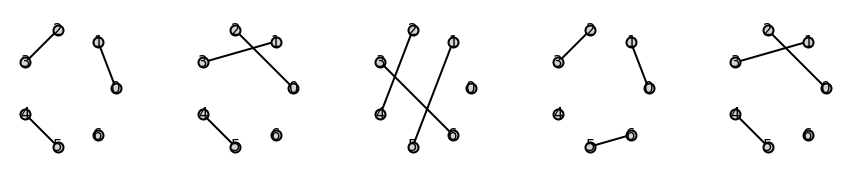

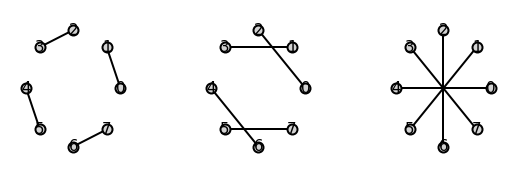

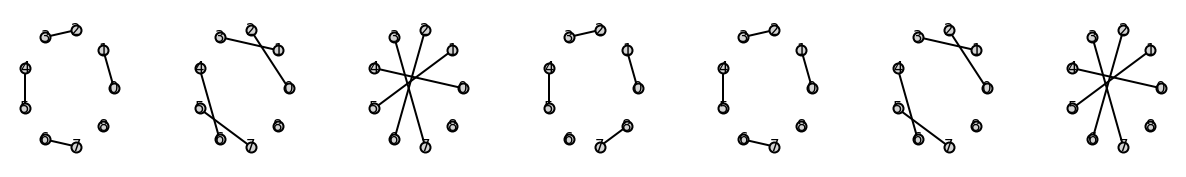

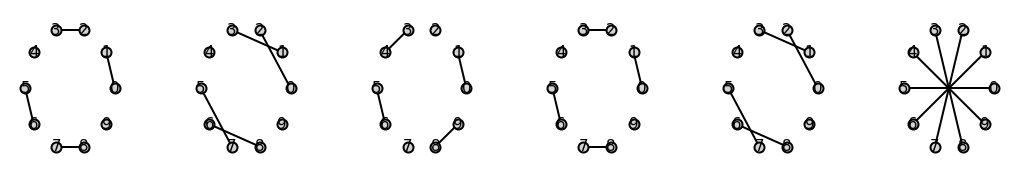

In [4]:
for n_nodes in range(1, 11):
    g = AdicGraph(n_nodes, max_degree=1)
    visualize(g, node_size=100, edge_label=False)
    if not is_finite_conv(g):
        print("ERROR")

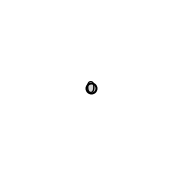

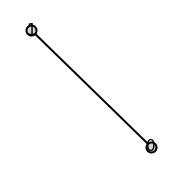

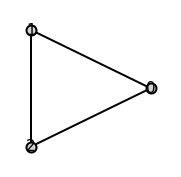

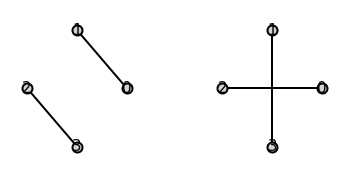

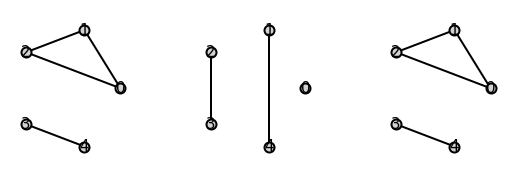

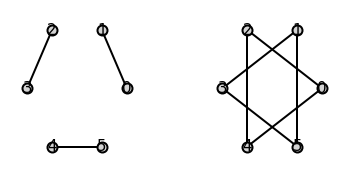

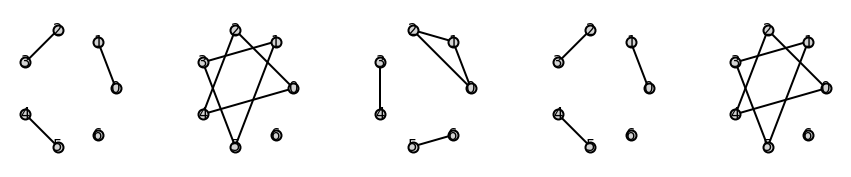

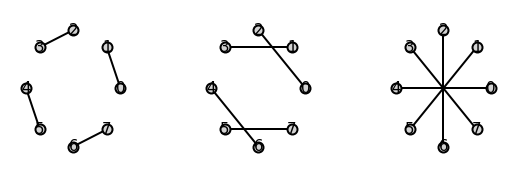

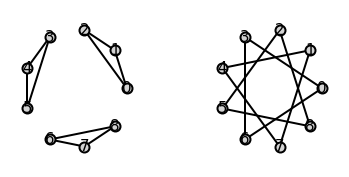

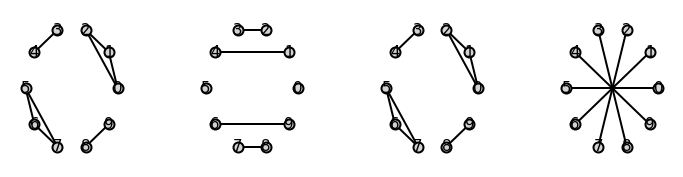

In [5]:
for n_nodes in range(1, 11):
    g = AdicGraph(n_nodes, max_degree=2)
    visualize(g, node_size=100, edge_label=False)
    if not is_finite_conv(g):
        print("ERROR", n_nodes)

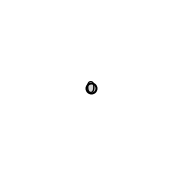

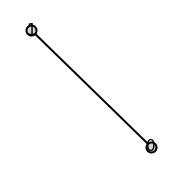

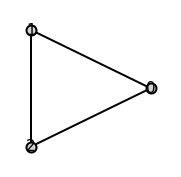

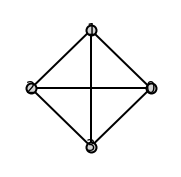

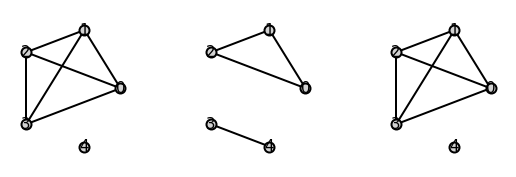

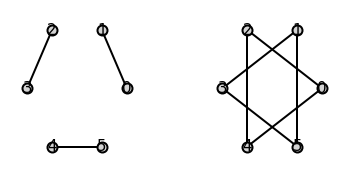

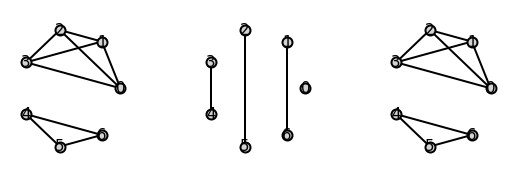

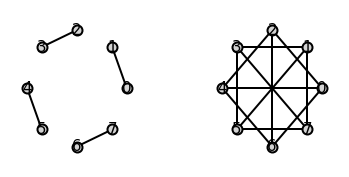

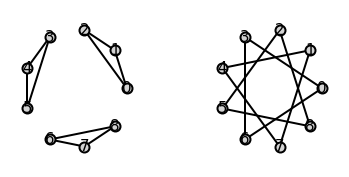

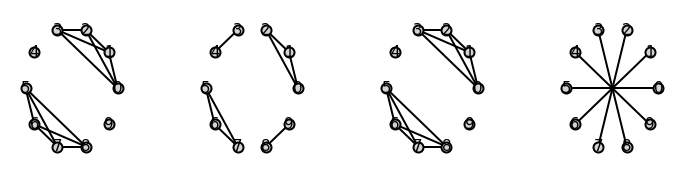

In [6]:
for n_nodes in range(1, 11):
    g = AdicGraph(n_nodes, max_degree=3)
    visualize(g, node_size=100, edge_label=False)
    if not is_finite_conv(g):
        print("ERROR", n_nodes)

True

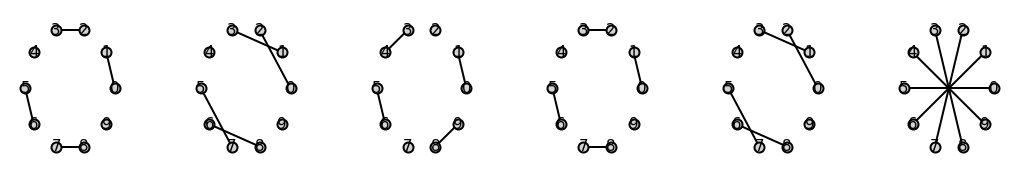

In [7]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(10, max_degree=1)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

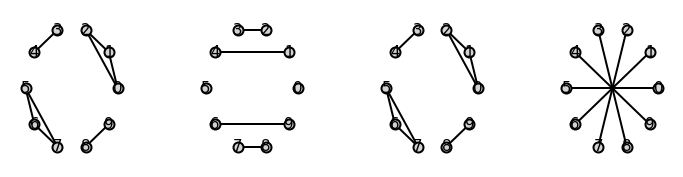

In [8]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(10, max_degree=2)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

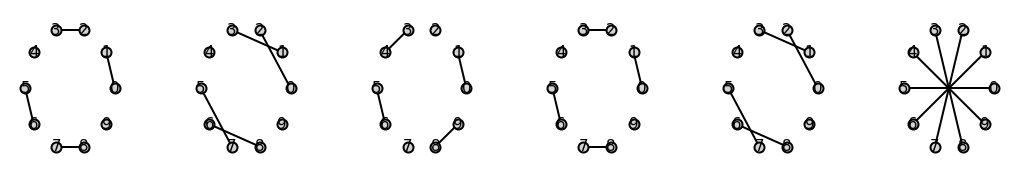

In [9]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(10, max_degree=1)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

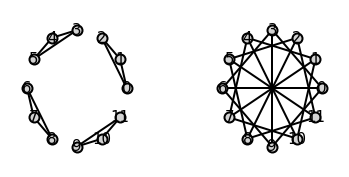

In [10]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(12, max_degree=5)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

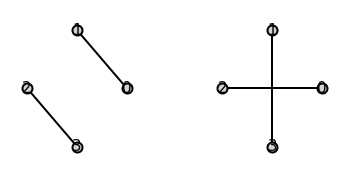

In [11]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(4, max_degree=1)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

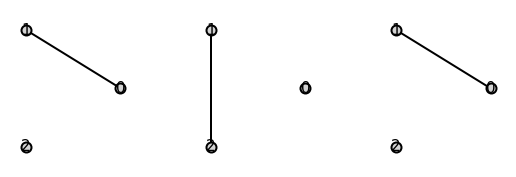

In [12]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(3, max_degree=1)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

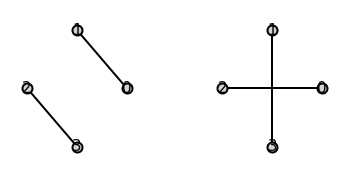

In [13]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(4, max_degree=2)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

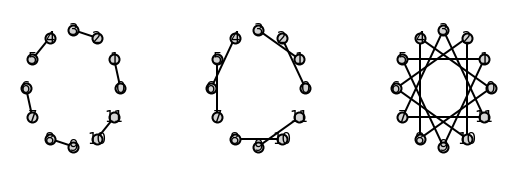

In [14]:
#　この結果おかしい。4個のクラスタは2^2の方が速いはず
g = AdicGraph(12, max_degree=2)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

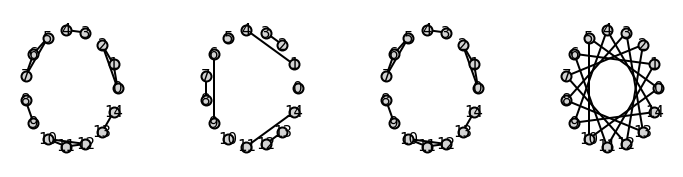

In [15]:
g = AdicGraph(15, max_degree=2)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

True

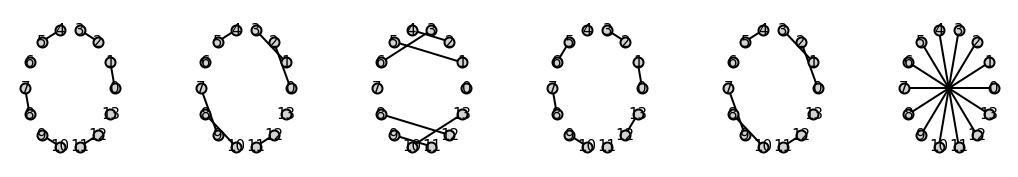

In [16]:
g = AdicGraph(14)
visualize(g, node_size=100, edge_label=False)
is_finite_conv(g)

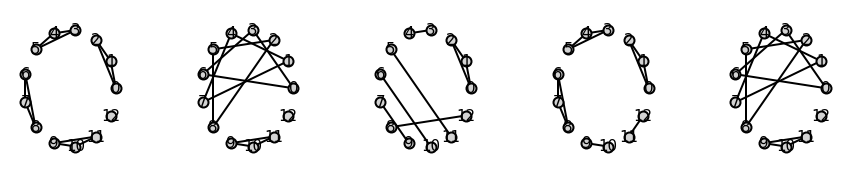

In [17]:
g = SimpleAdicGraph(13, max_degree=2)
visualize(g, node_size=100, edge_label=False)

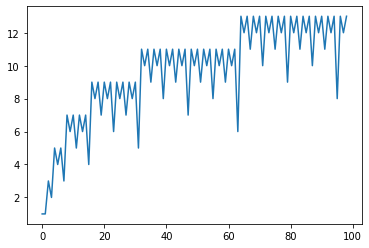

In [18]:
length = []
for n_nodes in range(1, 100):
    #print(n_nodes)
    g = AdicGraph(n_nodes)
    length.append(len(g.w_list))
plt.plot(length)

100%|██████████| 49/49 [00:00<00:00, 71.11it/s] 


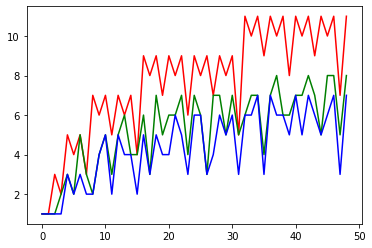

In [19]:
colors = ["red", "green", "blue"]
for (max_degree, color) in zip([1,2,3], colors):
    length = []
    for n_nodes in tqdm(range(1, 50)):
        g = AdicGraph(n_nodes, max_degree=max_degree)
        length.append(len(g.w_list))
    plt.plot(length, label=max_degree, color=color)

100%|██████████| 49/49 [00:00<00:00, 102.66it/s]


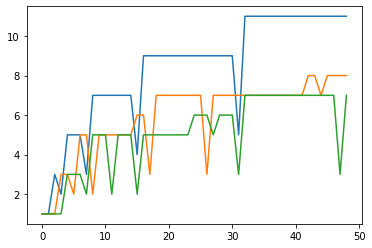

In [20]:
for max_degree in [1,2,3]:
    length = []
    for n_nodes in tqdm(range(1, 50)):
        g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
        length.append(len(g.w_list))
    plt.plot(length, label=max_degree)